In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.feature_selection

In [2]:
# Step 1: Data Loading & Preprocessing
data = pd.read_csv("../data/daily_NGD.csv", delimiter=",")

data["Date"] = pd.to_datetime(data["Date"])

# Handling missing values, you can replace them with the median for simplicity
data.fillna(data.median(), inplace=True)

In [3]:
# List of target variables and their corresponding features
targets = ["NGD", "LDZ", "IND", "GTP"]
features = [
    "HDD",
    "HDD-1",
    "Rus",
    "Workday",
    "Month",
    "War",
    "DE wind",
    "DE solar",
    # "DE nuclear",
    "FR nuclear",
    "THE price",
    "DE IND index",
    "EU storage",
    "EU LNG",
    "UK NL production",
    "Norway sendout",
    "African TAP",
]

In [4]:
# Storing results
mi_results = {}

for target in targets:
    mi_values = sklearn.feature_selection.mutual_info_regression(
        data[features], data[target]
    )
    mi_results[target] = mi_values

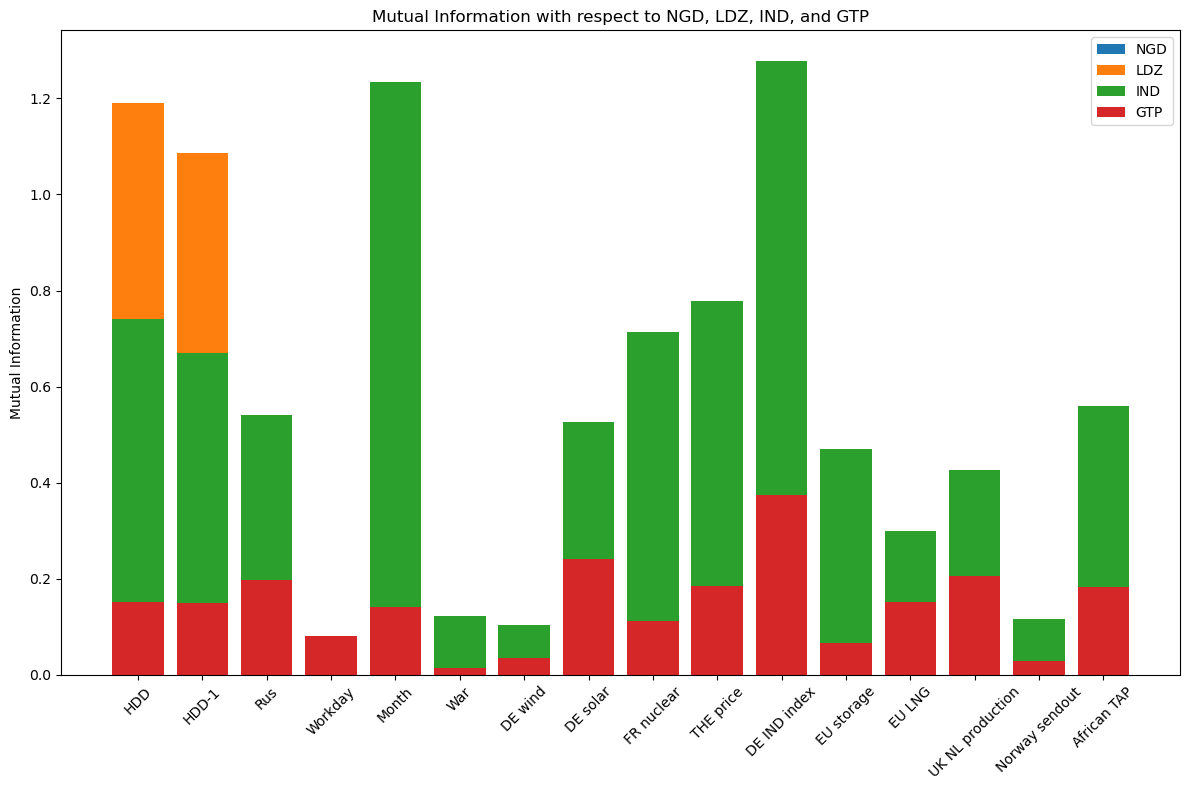

In [5]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

for target, mi_values in mi_results.items():
    ax.bar(features, mi_values, label=target)

ax.set_ylabel("Mutual Information")
ax.set_title("Mutual Information with respect to NGD, LDZ, IND, and GTP")
ax.set_xticks(features)
ax.set_xticklabels(features, rotation=45)
ax.legend()

plt.tight_layout()
plt.savefig("../figures/mutual_information.png")
plt.show()

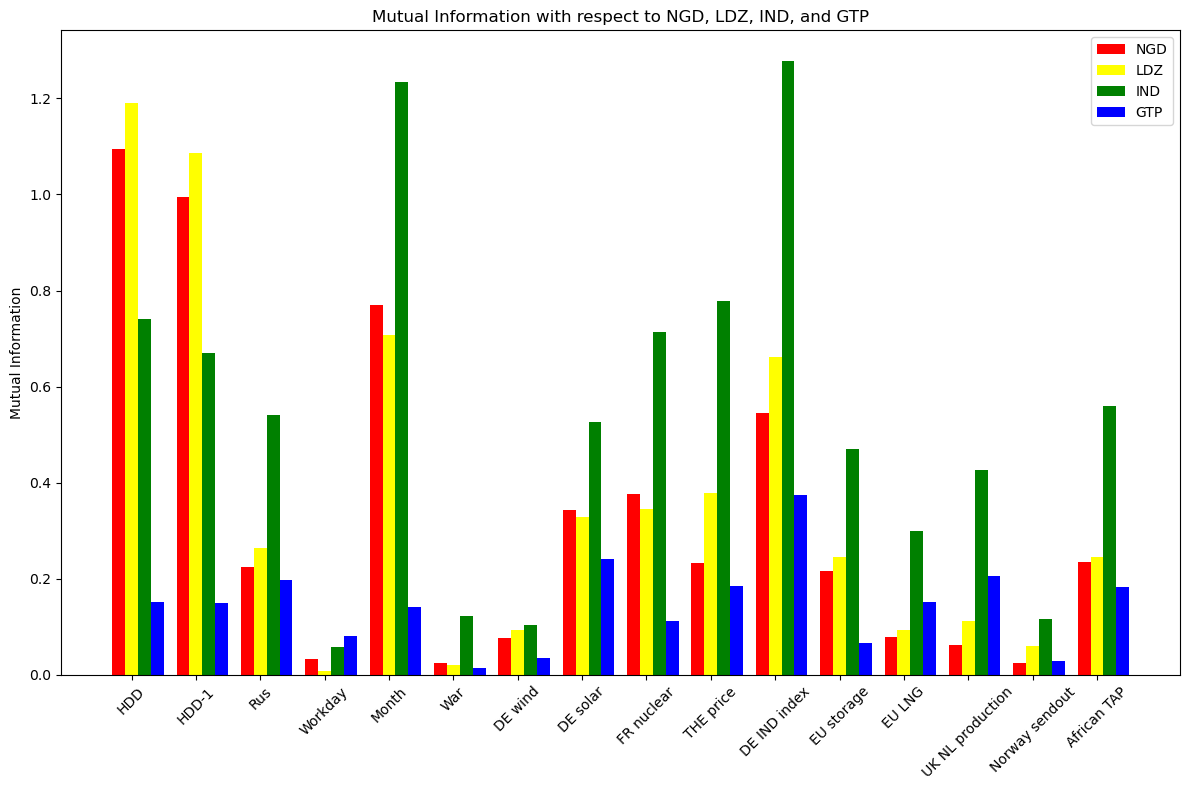

In [6]:
# Step 4: Results Display (Using Grouped Bar Chart)

# Calculate bar width and positions
barWidth = 0.2
r1 = np.arange(len(features))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(r1, mi_results["NGD"], width=barWidth, label="NGD", color="red")
ax.bar(r2, mi_results["LDZ"], width=barWidth, label="LDZ", color="yellow")
ax.bar(r3, mi_results["IND"], width=barWidth, label="IND", color="green")
ax.bar(
    r4, mi_results["GTP"], width=barWidth, label="GTP", color="blue"
)  # Added a different color for clarity

ax.set_ylabel("Mutual Information")
ax.set_title("Mutual Information with respect to NGD, LDZ, IND, and GTP")
ax.set_xticks([r + barWidth for r in range(len(features))])
ax.set_xticklabels(features, rotation=45)
ax.legend()

plt.tight_layout()
plt.savefig("../figures/mutual_information_grouped.png")
plt.show()

In [7]:
# Step 2: Rolling Correlation Analysis
window_size = 30  # You can adjust this value based on your dataset and objectives

# Storing results
rolling_corr_results = {}

for target in targets:
    target_corr = {}
    for feature in features:
        target_corr[feature] = (
            data[target].rolling(window=window_size).corr(data[feature])
        )
    rolling_corr_results[target] = target_corr

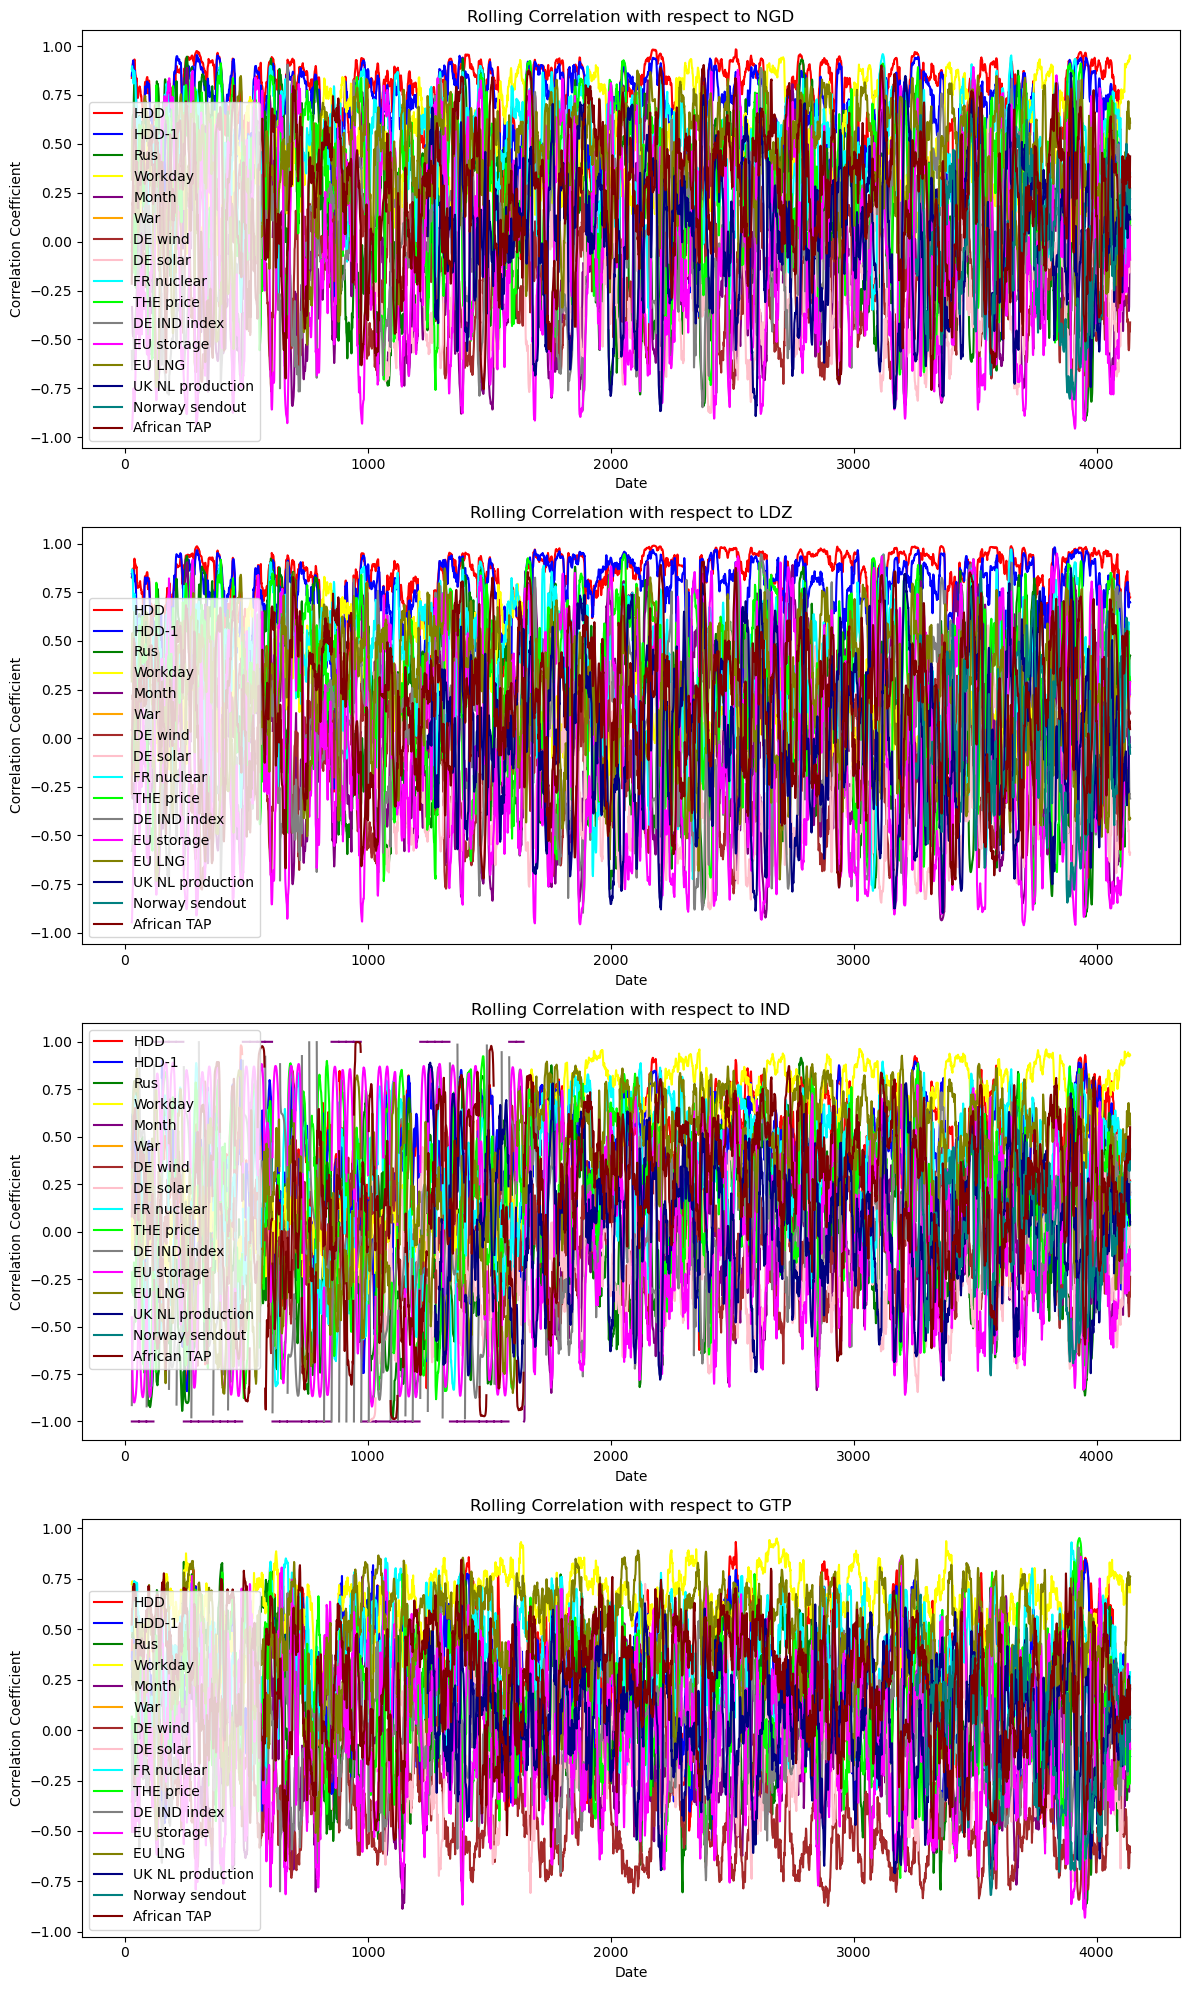

In [8]:
# Color palette for the features
color_palette = [
    "red",
    "blue",
    "green",
    "yellow",
    "purple",
    "orange",
    "brown",
    "pink",
    "cyan",
    "lime",
    "gray",
    "magenta",
    "olive",
    "navy",
    "teal",
    "maroon",
]

# Step 3: Results Display
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

for ax, (target, correlations) in zip(axes, rolling_corr_results.items()):
    for idx, (feature, corr_series) in enumerate(correlations.items()):
        ax.plot(corr_series, label=feature, color=color_palette[idx])
    ax.set_title(f"Rolling Correlation with respect to {target}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Correlation Coefficient")
    ax.legend()

plt.tight_layout()
plt.savefig("../figures/rolling_correlation.png")
plt.show()

In [9]:
ngd_data = data.copy()
ngd_data.set_index("Date", inplace=True)

# Resample the data to weekly frequency and calculate the mean for each week
weekly_avg_data = ngd_data.resample("W").mean()

# Save the weekly average data to a new CSV file
weekly_avg_data.to_csv("../data/weekly_average_NGD.csv", sep=",")

In [10]:
# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg_data = ngd_data.resample("ME").mean()

# Save the monthly average data to a new CSV file
monthly_avg_data.to_csv("../data/monthly_average_NGD.csv", sep=",")